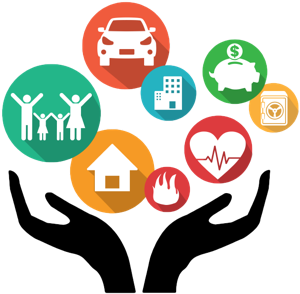

Prudential, one of the largest issuers of life insurance in the USA.

In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry


# Goal

In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/prudential-life-insurance-assessment/test.csv.zip
/kaggle/input/prudential-life-insurance-assessment/sample_submission.csv.zip
/kaggle/input/prudential-life-insurance-assessment/train.csv.zip


Importing necessary packages and data

In [2]:
import pandas as pd 
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
train=pd.read_csv('../input/prudential-life-insurance-assessment/train.csv.zip')
test=pd.read_csv('../input/prudential-life-insurance-assessment/test.csv.zip')

## Data Description

* train.csv - the training set, contains the Response values
* test.csv - the test set, you must predict the Response variable for all rows in this file


* Id :	A unique identifier associated with an application.
* Product_Info_1-7 :	A set of normalized variables relating to the product applied for
* Ins_Age :	Normalized age of applicant
* Ht :	Normalized height of applicant
* Wt :	Normalized weight of applicant
* BMI :	Normalized BMI of applicant
* Employment_Info_1-6 :	A set of normalized variables relating to the employment history of the applicant.
* InsuredInfo_1-6 :	A set of normalized variables providing information about the applicant.
* Insurance_History_1-9 :	A set of normalized variables relating to the insurance history of the applicant.
* Family_Hist_1-5 :	A set of normalized variables relating to the family history of the applicant.
* Medical_History_1-41 :	A set of normalized variables relating to the medical history of the applicant.
* Medical_Keyword_1-48 :	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
* Response :	This is the target variable, an ordinal variable relating to the final decision associated with an application

In [5]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.077,2,1,1,0.642,0.582,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.077,2,3,1,0.060,0.600,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.077,2,3,1,0.030,0.745,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487,2,3,1,0.164,0.673,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.231,2,3,1,0.418,0.655,...,0,0,0,0,0,0,0,0,0,8


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


#  Missing Value Analysis

In [11]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt
    #return(np.transpose(tt))

In [14]:
#checking missing value percentage in train data
missing_data(train)['Percent'].sort_values(ascending=False)

Medical_History_10   99.062
Medical_History_32   98.136
Medical_History_24   93.599
Medical_History_15   75.101
Family_Hist_5        70.411
                      ...  
Medical_Keyword_12    0.000
Medical_Keyword_13    0.000
Medical_Keyword_14    0.000
Medical_Keyword_15    0.000
Id                    0.000
Name: Percent, Length: 128, dtype: float64

In [15]:
#checking missing value percentage in train data
missing_data(test)['Percent'].sort_values(ascending=False)

Medical_History_10   98.983
Medical_History_32   98.224
Medical_History_24   94.030
Medical_History_15   75.204
Family_Hist_5        68.930
                      ...  
Medical_Keyword_11    0.000
Medical_Keyword_12    0.000
Medical_Keyword_13    0.000
Medical_Keyword_14    0.000
Id                    0.000
Name: Percent, Length: 127, dtype: float64

Dropping columns which has more than 75% missing value

In [22]:
train=train[train.columns[train.isnull().mean() <= 0.75]]

In [17]:
test=test[test.columns[test.isnull().mean() <= 0.75]]

In [26]:
train.isnull().sum().sort_values(ascending=False)

Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
                       ...  
Medical_Keyword_13         0
Medical_Keyword_14         0
Medical_Keyword_15         0
Medical_Keyword_16         0
Id                         0
Length: 124, dtype: int64

In [27]:
test.isnull().sum().sort_values(ascending=False)

Family_Hist_5          13624
Family_Hist_3          11064
Family_Hist_2           9880
Insurance_History_5     8105
Family_Hist_4           6677
                       ...  
Medical_Keyword_12         0
Medical_Keyword_13         0
Medical_Keyword_14         0
Medical_Keyword_15         0
Id                         0
Length: 123, dtype: int64

**Taking null value column names**

In [28]:
 list_train=train.columns[train.isna().any()].tolist()

In [29]:
list_test=test.columns[test.isna().any()].tolist()

**Printing column names and data types  which has null values**

In [31]:
for i in range(0,len(list_train)):
    print('column name: ',list_train[i],' Dtype:',train[list_train[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


In [32]:
for i in range(0,len(list_test)):
    print('column name: ',list_test[i],' Dtype:',train[list_test[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


**Filling Null Values With Mean**

In [33]:
for column in list_train:
    train[column].fillna(train[column].mean(), inplace=True)

In [34]:
for column in list_test:
    test[column].fillna(test[column].mean(), inplace=True)

In [36]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 124 entries, Id to Response
dtypes: float64(14), int64(109), object(1)
memory usage: 56.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 123 entries, Id to Medical_Keyword_48
dtypes: float64(14), int64(108), object(1)
memory usage: 18.5+ MB


## Label Encoding

In [38]:
obj_train=list(train.select_dtypes(include=['object']).columns)
obj_test=list(test.select_dtypes(include=['object']).columns)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train[obj_train]=le.fit_transform(train[obj_train])
test[obj_test]=le.transform(test[obj_test])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#  **Analysing features**

* **Weight**

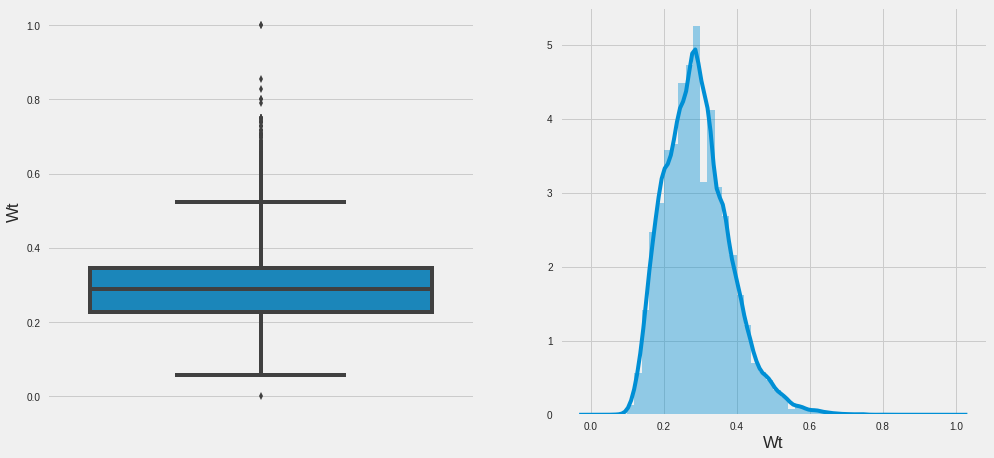

In [44]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['Wt'],  ax=axes[1])

* **Height**

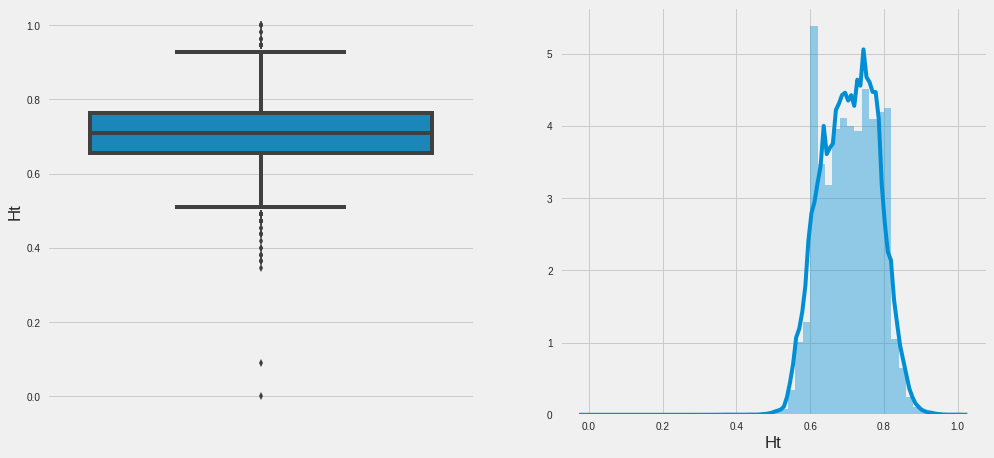

In [45]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['Ht'],  ax=axes[1])

* **BMI**

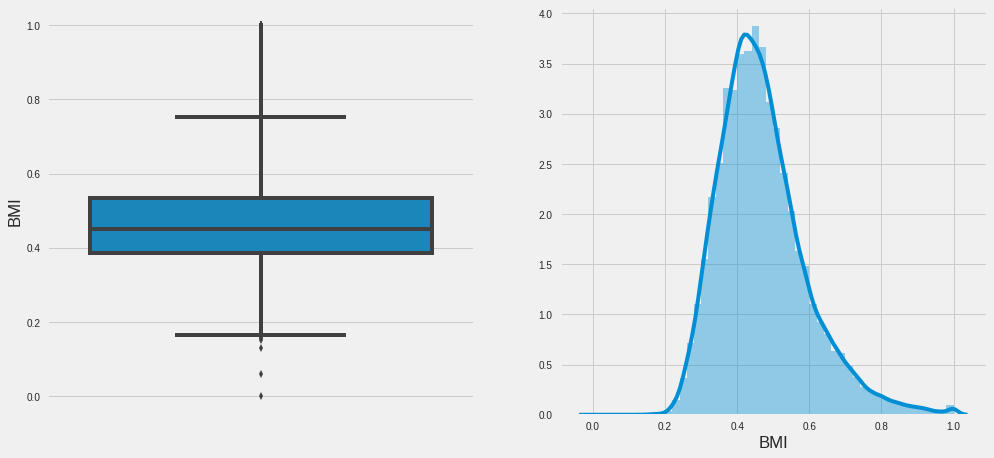

In [46]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['BMI'],  ax=axes[1])

* **Age**

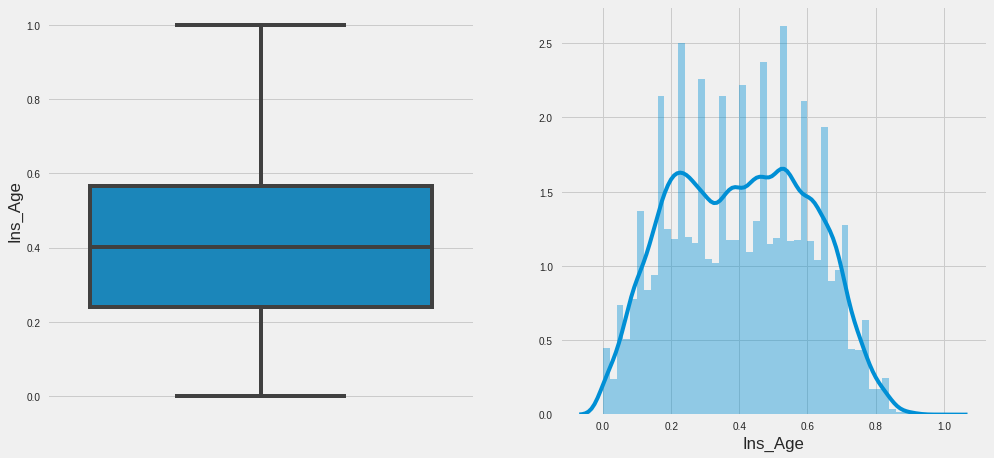

In [47]:
f,axes=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='Ins_Age',data=train,orient='v',ax=axes[0])
sns.distplot(train['Ins_Age'],ax=axes[1])

**The image above is a comparison of a boxplot of a nearly normal distribution and the probability density function (pdf) for a normal distribution. The reason why I am showing you this image is that looking at a statistical distribution is more commonplace than looking at a box plot. In other words, it might help you understand a boxplot.**

#  **Target Variable Analysis**

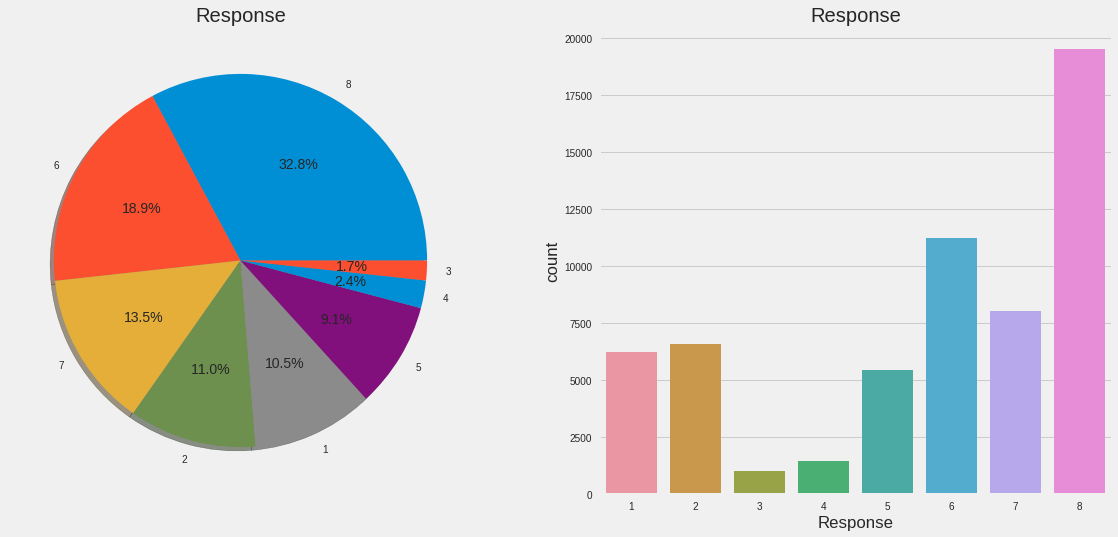

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train,ax=ax[1])
ax[1].set_title('Response')
plt.show()

**We can see that Class 8 has the highest distribution.**

 ****Converting target variable****

**We will do a binary classification by altering the target variable. The new problem statement would be - Based on the attributes of customers, will the life insurance policy be approved or not i.e.yes(1) or no(0).we will turn this Multiclass classification challenge into Binary classification challenge.**

**We are making 0 to 7 as one class and 8 as another class**

In [48]:
#create a funtion to create a  new target variable based on conditions 

def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

In [49]:
#create a copy of original dataset
new_data=train.copy()

In [51]:
#create a new column
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [53]:
new_data['Final_Response'].value_counts()

0    39892
1    19489
Name: Final_Response, dtype: int64

Text(0.5, 1.0, 'Distribution of rows by response categories')

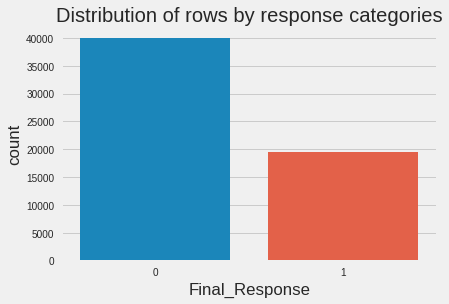

In [54]:
#distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [55]:
#dropping already existing column
new_data.drop(['Response'],axis=1,inplace=True)
train=new_data
del new_data

In [56]:
train.rename(columns={'Final_Response':'Response'},inplace=True)

Categorizing BMI,AGE,HEIGHT and WEIGHT based on their values

In [57]:
# BMI Categorization
conditions = [
    (train['BMI'] <= train['BMI'].quantile(0.25)),
    (train['BMI'] > train['BMI'].quantile(0.25)) & (train['BMI'] <= train['BMI'].quantile(0.75)),
    (train['BMI'] > train['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

train['BMI_Wt'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (train['Ins_Age'] <= train['Ins_Age'].quantile(0.25)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.25)) & (train['Ins_Age'] <= train['Ins_Age'].quantile(0.75)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
train['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (train['Ht'] <= train['Ht'].quantile(0.25)),
    (train['Ht'] > train['Ht'].quantile(0.25)) & (train['Ht'] <= train['Ht'].quantile(0.75)),
    (train['Ht'] > train['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

train['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (train['Wt'] <= train['Wt'].quantile(0.25)),
    (train['Wt'] > train['Wt'].quantile(0.25)) & (train['Wt'] <= train['Wt'].quantile(0.75)),
    (train['Wt'] > train['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

train['Thin_Fat'] = np.select(conditions, choices)

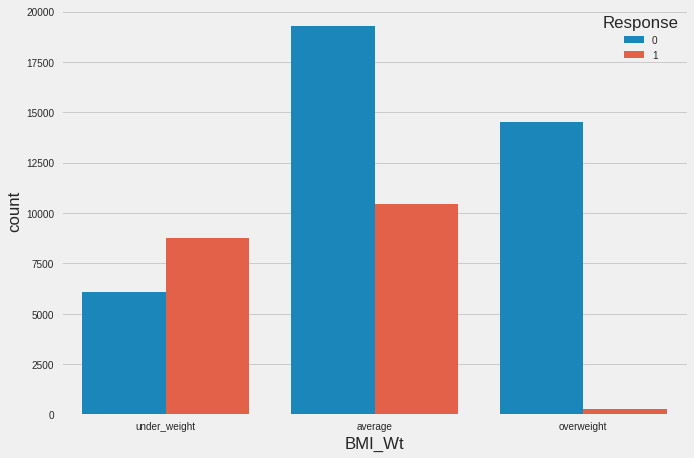

In [58]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = train)

Overweight policyholders are not offered standard terms.



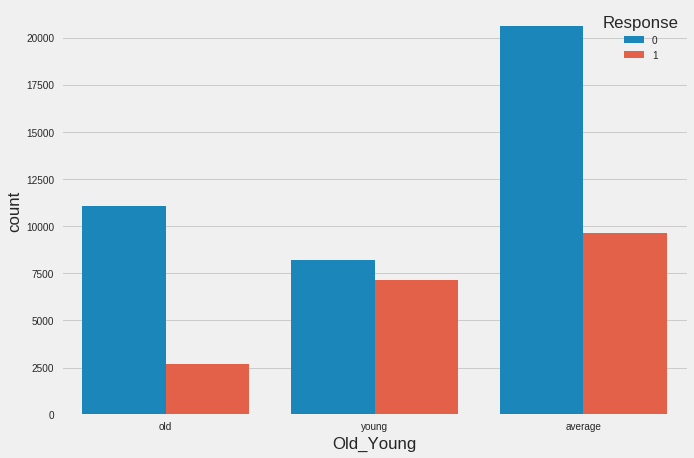

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Old_Young', hue = 'Response', data = train)

Compared to young lives and average lives, more often, old lives were not offered standard terms

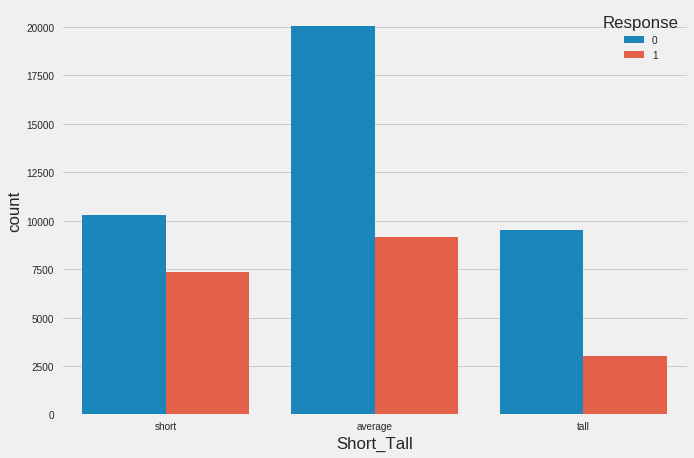

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Response', data = train)

This does not indicate any behaviour



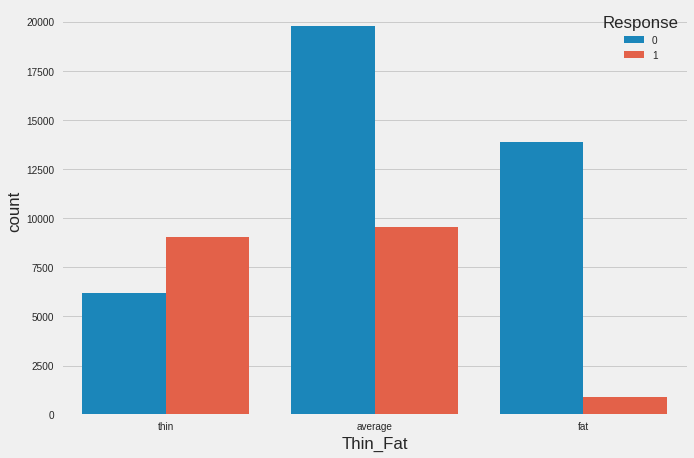

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Response', data = train)


Fat people are not offered standard terms



**Let's get deeper into it**

In [62]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

train['extreme_risk'] = train.apply(new_target,axis=1)

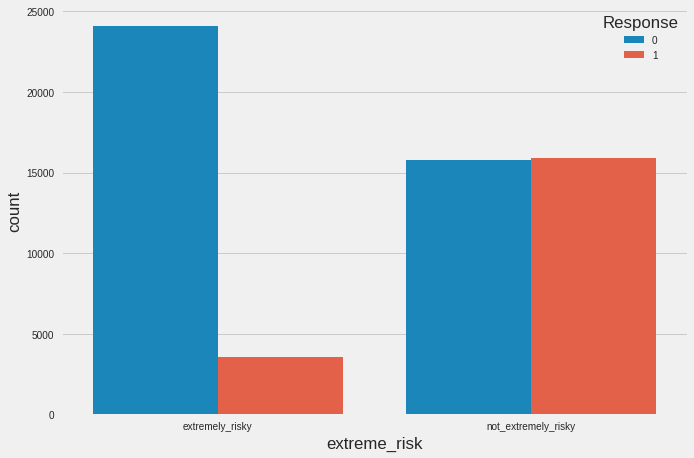

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'extreme_risk', hue = 'Response', data = train)

Under "extreme risk" category, lots of policies are getting either rejected or issued on substandard terms


In [64]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Old_Young']=='average')  or (row['Thin_Fat']=='average'):
        val='average'
    else:
        val='non_average'
    return val

train['average_risk'] = train.apply(new_target,axis=1)

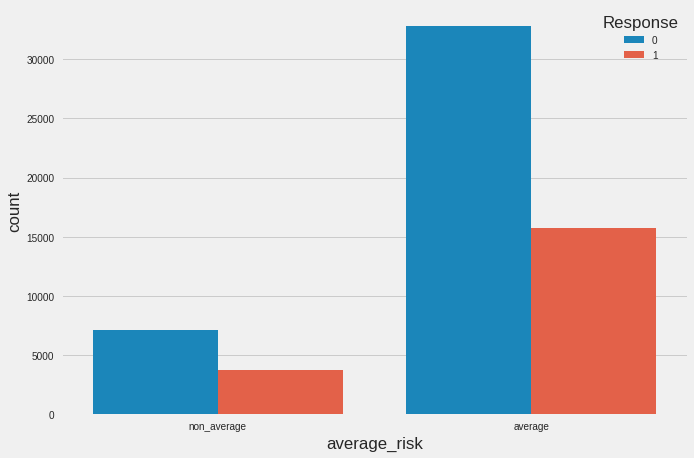

In [65]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'average_risk', hue = 'Response', data = train)

This does not indicate any behaviour

In [66]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

train['low_end_risk'] = train.apply(new_target,axis=1)

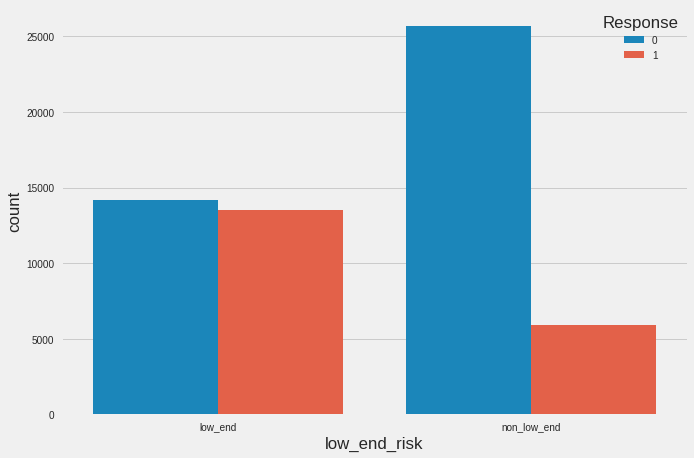

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Response', data = train)

Under non-low-end risk category, lots of policies are either getting rejected or issued at substandard terms.

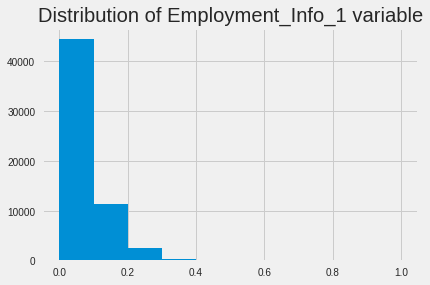

In [68]:
plt.hist(train['Employment_Info_1']);
plt.title('Distribution of Employment_Info_1 variable');

**Exploring product features**

In [69]:
train['Product_Info_1'].value_counts()

1    57816
2     1565
Name: Product_Info_1, dtype: int64

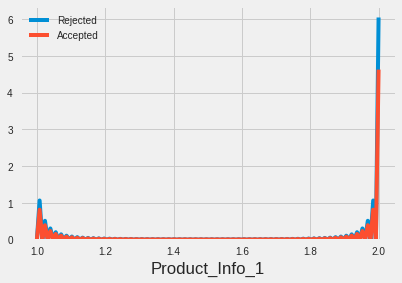

In [70]:
#product1 vs response
sns.distplot(train[train['Response']==0]['Product_Info_1'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_1'],hist=False,label='Accepted')

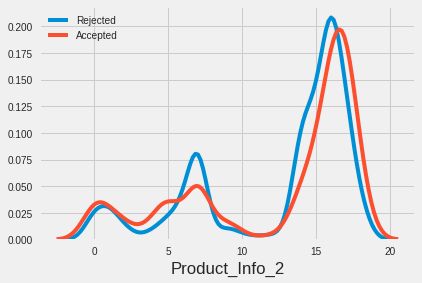

In [72]:
#product2 vs response
sns.distplot(train[train['Response']==0]['Product_Info_2'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_2'],hist=False,label='Accepted')

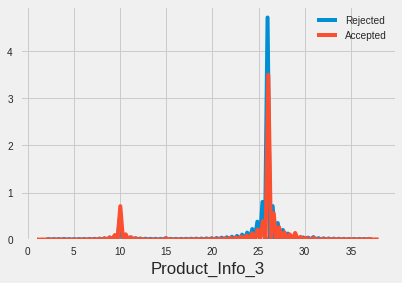

In [73]:
#product3 vs response
sns.distplot(train[train['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_3'],hist=False,label='Accepted')

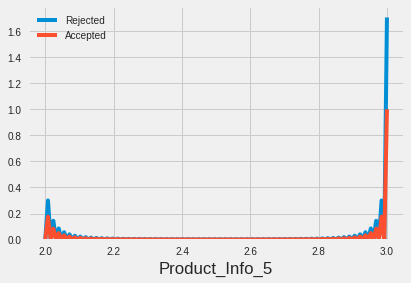

In [74]:
#product5 vs response
sns.distplot(train[train['Response']==0]['Product_Info_5'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_5'],hist=False,label='Accepted')

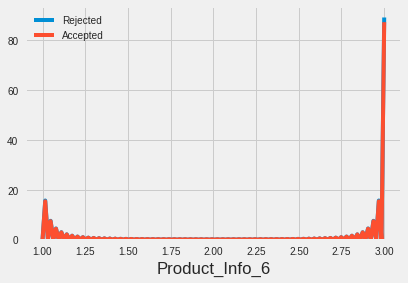

In [75]:
#product6 vs response
sns.distplot(train[train['Response']==0]['Product_Info_6'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_6'],hist=False,label='Accepted')

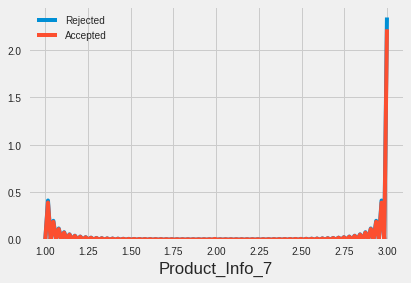

In [76]:
#product7 vs response
sns.distplot(train[train['Response']==0]['Product_Info_7'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_7'],hist=False,label='Accepted')

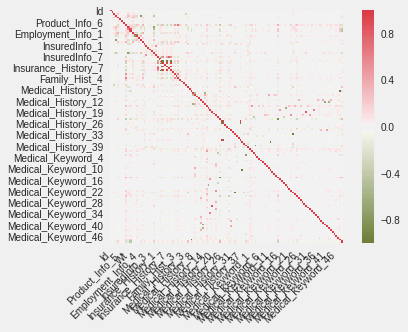

In [77]:
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 370, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We are not getting clear Visual on correlation Graph.

In this notebook we have seen how the data for the machine learning models are analyzed  and we can see how visualization helps us to understand the data better.